In [1]:
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt

In [13]:
def myF(x):
    return x**3

In [9]:
def takeDATA(a, b, n):
    NODES = np.linspace(a, b, n+1)
    VALUES = [myF(x) for x in NODES]
    df0 = derivative(myF, NODES[0], dx=1e-6)
    dfn = derivative(myF, NODES[len(NODES)-1], dx=1e-6)
    print("NODES: ", [x for x in NODES])
    print("VALUES: ", VALUES)
    print("DERIVATIVE in \nx0: ", df0, "\nxn: ", dfn)

In [10]:
#Метод ПРОГОНКИ
def TMA(A, B):
    KSI = [0]
    ETA = [0]

    for i in range(len(A)):
        if(i == 0):
            ksi = -A[i][i+1]/A[i][i]
            eta = (B[i])/(A[i][i])
            KSI.append(ksi)
            ETA.append(eta)
        elif(i == len(A)-1):
            ksi = 0
            eta = (B[i] - A[i][i-1]*ETA[i])/(A[i][i-1]*KSI[i] + A[i][i])
            KSI.append(ksi)
            ETA.append(eta)
        else:
            ksi = -A[i][i+1]/(A[i][i-1]*KSI[i] + A[i][i])
            eta = (B[i] - A[i][i-1]*ETA[i])/(A[i][i-1]*KSI[i] + A[i][i])
            KSI.append(ksi)
            ETA.append(eta)
        
    X = [ETA[len(A)]]

    for i in range(len(B)-1, -1, -1):
        x = KSI[i+1]*X[0] + ETA[i+1]
        X.insert(0, x)

    X.pop()
    return X

In [11]:
#Построение СПЛАЙНА
def BuildSpline(a, b, n, NODES, VALUES, df0, dfn, some_node):
    IntSteps = [NODES[i] - NODES[i-1] for i in range(1, n+1)]
    A = [[0 for i in range(n+1)] for i in range(n+1)]
    B = [0 for i in range(n+1)]

    #-----ПОСТРОЕНИЕ-МАТРИЦЫ-СИСТЕМЫ----------------------------------------------
    for i in range(len(A)):
        if(i == 0):
            A[i][i] = IntSteps[i]/3
            A[i][i+1] = IntSteps[i]/6
            B[i] = ((VALUES[i+1] - VALUES[i])/IntSteps[i]) - df0
        elif(i == n):
            A[i][i] = IntSteps[i-1]/3
            A[i][i-1] = IntSteps[i-1]/6
            B[i] = dfn - ((VALUES[i] - VALUES[i-1])/IntSteps[i-1])
        else:
            A[i][i-1] = IntSteps[i-1]
            A[i][i] = 2*(IntSteps[i-1] + IntSteps[i])
            A[i][i+1] = IntSteps[i]
            B[i] = 6*(((VALUES[i+1] - VALUES[i])/IntSteps[i]) - ((VALUES[i] - VALUES[i-1])/IntSteps[i-1]))

    #-----РЕШЕНИЕ-СИСТЕМЫ---------------------------------------------------------        
    M = TMA(A, B)
    #-----ПОСТРОЕНИЕ-ГРАФИКА------------------------------------------------------
    fX = np.linspace(a, b, 100)
    fY = [myF(x) for x in fX]

    spX = np.linspace(a, b, 100)
    spY = []
    
    for x in spX:
        for i in range(1, n+1):
            if(some_node <= NODES[i]): break
        y = (M[i-1]*((NODES[i] - some_node)**3/(6*IntSteps[i-1])) + M[i]*((x - NODES[i-1])**3/(6*IntSteps[i-1])) 
            + (VALUES[i-1] - (M[i-1]*IntSteps[i-1]**2)/6)*(NODES[i] - some_node)/IntSteps[i-1] 
            + (VALUES[i] - (M[i]*IntSteps[i-1]**2)/6)*(some_node - NODES[i-1])/IntSteps[i-1])
        spY.append(y)
    
    for i in range(1, n+1):
            if(some_node <= NODES[i]): break
        y = (M[i-1]*((NODES[i] - x)**3/(6*IntSteps[i-1])) + M[i]*((x - NODES[i-1])**3/(6*IntSteps[i-1])) 
            + (VALUES[i-1] - (M[i-1]*IntSteps[i-1]**2)/6)*(NODES[i] - x)/IntSteps[i-1] 
            + (VALUES[i] - (M[i]*IntSteps[i-1]**2)/6)*(x - NODES[i-1])/IntSteps[i-1])
        spY.append(y)
    
    up = max(max(spY), max(fY)) + 0.5
    down = min(min(spY), min(fY)) - 0.5
    
    plt.plot(fX, fY, "blue", label = "$myF$") 
    plt.plot(spX, spY, "red", label = "$Spline$")
    plt.plot(NODES, VALUES, "o", label = "$DATA$")
    plt.grid(True)
    plt.axis([a, b, down, up])
    plt.legend()
    plt.show()

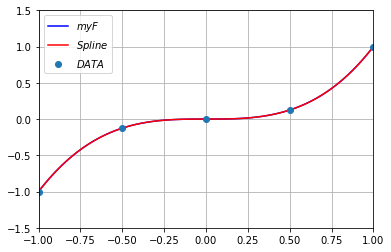

In [16]:
BuildSpline(-1, 1, 4, 
            [-1.0, -0.5, 0.0, 0.5, 1.0], 
            [-1.0, -0.125, 0.0, 0.125, 1.0], 
            2.99999999992, 2.99999999992)

In [15]:
takeDATA(-1, 1, 4)

NODES:  [-1.0, -0.5, 0.0, 0.5, 1.0]
VALUES:  [-1.0, -0.125, 0.0, 0.125, 1.0]
DERIVATIVE in 
x0:  2.99999999992 
xn:  2.99999999992
